# BMW Gebrauchtwagenpreis

Mein Ziel ist es, anhand der "Spezifikationen" eines Autos den Preis `(price)` vorherzusagen. Heisst zu verstehen, welche Daten welche Auswirkungen auf den Preis haben, um dann diesen zu bestimmen.  



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

bmws = pd.read_csv(os.path.join("bmw-dataset", "bmw.csv"))

In [5]:
bmws.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


## relevante statistische Informationen

Definieren von Informationen wie Median, Standardabweichung etc. für die Spalten in `bmw.csv`

- model                           
  Für das Modell habe ich die vorhandenen Modelle anzeigen lassen, um eine Übersicht zu bekommen. Ausserdem habe ich die
  meist vorhandene Modellart ausgelesen.

- year                            
  Für das Jahr habe ich auch die vorhandenen Jahre anzeigen lassen. Anhand dessen dann das meist vorhandene Jahr und das
  Durchschnittsjahr. Zusätzlich noch die Standardabweichung, um zu sehen, wie weit die Werte auseinanderliegen.

- mileage                            
  Hier habe ich die durchschnittlichen Meilen der Autos berechnet. Anschliessend habe ich mir den kleinsten und den grössten 
  Wert ausgelesen und dazu noch den Median um die Spanne der Daten zu veranschaulichen. Anschliessend habe ich auch für diese    Daten die Standardabweichung berechnet.

- fueltype                
  Hier wollte ich nur wissen welche Treibstoffarten im Datensatz vorhanden sind und welche am meisten vorkommt

- transmisson                               
  Hier wollte ich auch nur herausfinden, welche Getriebearten im Datensatz vorkommen und welche Getriebeart die häufigste ist.

- price                         
  Beim Preis habe ich auch zuerst den Durchschnittspreis der Autos berechnet. Dann das Auto mit den wenigstens Meilen (welches   ein Neuwagen ist) und das mit den meisten Meilen. Ausserdem habe ich wie die Standardabweichung berechnet und den Median um
  etwa die Mitte des Datensatzes zu kennen im Vergleich mit den Min und Max Wert. 

In [6]:
# model Informationen

# Vorhandene Modellarten
unique_model = bmws['model'].unique()
print(unique_model)

# Modus
model_mode = bmws['model'].mode()
print(model_mode)

[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
0     3 Series
Name: model, dtype: object


In [7]:
# year Informationen

# Vorhandene Jahre
unique_year = bmws['year'].unique()
print(unique_year)

# Durchschnitt
year_mean = bmws['year'].mean()
print(year_mean)

# Modus
year_mode = bmws['year'].mode()
print(year_mode)

# standartabweichung 
year_std =  bmws['year'].std()
print(year_std)

[2014 2018 2016 2017 2015 2019 2013 2020 2002 2004 2007 2008 2011 2012
 2009 2006 2010 2003 2001 2005 2000 1999 1996 1997 1998]
2017.078935163714
0    2019
Name: year, dtype: int64
2.3490381360718264


In [8]:
# mileage Informationen

# Durchschnitt
mileage_mean = bmws['mileage'].mean()
print(mileage_mean)

# min / max
mileage_min = bmws['mileage'].min()
mileage_max = bmws['mileage'].max()
print(mileage_min)
print(mileage_max)

# Standartabweichung
mileage_std = bmws['mileage'].std()
print(mileage_std)

# Median
mileage_median = bmws['mileage'].median()
print(mileage_median)

25496.986550412763
1
214000
25143.19255929799
18347.0


In [9]:
# fueltype Informationen

# Vorhandene Benzinarten
unique_fueltype = bmws['fuelType'].unique()
print(unique_fueltype)

# Modus
fueltype_mode = bmws['fuelType'].mode()
print(fueltype_mode)



['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']
0    Diesel
Name: fuelType, dtype: object


In [10]:
# transmisson Informationen

# Vorhandene Getriebe
unique_transmission = bmws['transmission'].unique()
print(unique_transmission)

# Modus
transmission_mode = bmws['transmission'].mode()
print(transmission_mode)

['Automatic' 'Manual' 'Semi-Auto']
0    Semi-Auto
Name: transmission, dtype: object


In [11]:
# price Informationen

# Durchschnitt
price_mean = bmws['price'].mean()
print(price_mean)

# min / max
price_min = bmws['price'].min()
price_max = bmws['price'].max()
print(price_min)
print(price_max)

# Standardabweichung
price_std = bmws['price'].std()
print(price_std)

# Median
price_mean = bmws['price'].median()
print(price_mean)

22733.408867452
1200
123456
11415.528189035635
20462.0


## Grafik erstellen 

Eine Veranschaulichung der Daten durch eine Grafik.
1. Grafik: Veranschaulichung der Verteilung der Preise. 

Text(0, 0.5, 'Anzahl')

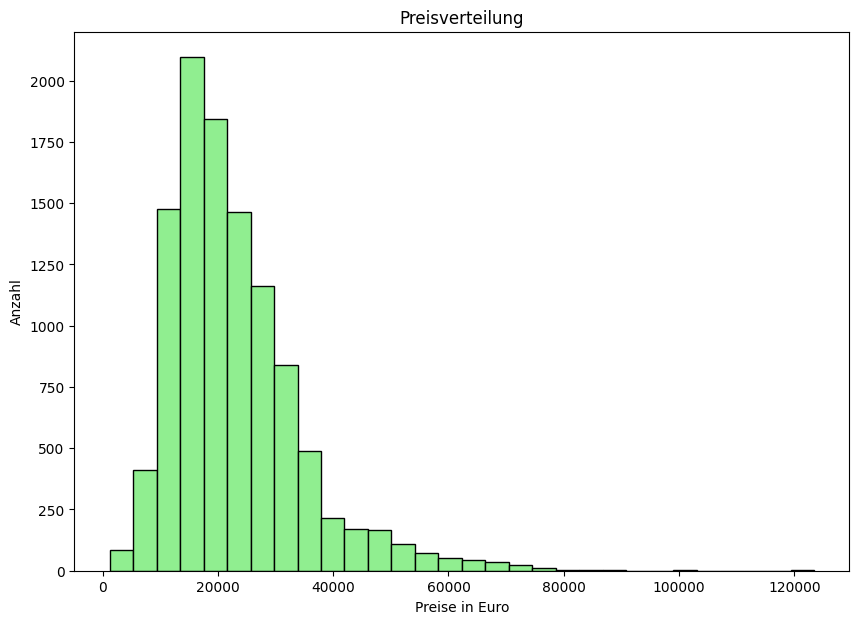

In [12]:
plt.figure(figsize=(10, 7))
plt.hist(bmws["price"], bins=30, edgecolor="black", color="lightgreen")
plt.title("Preisverteilung")
plt.xlabel("Preise in Euro")
plt.ylabel("Anzahl")

## Skalieren

Da mein Datensatz unterschiedliche Werte in unterschiedlichen Einheiten hat, ist es nötig diese Werte zu skalieren. Sonst würden grössere Werte wie z.B der Preis die das Modell mehr beeinflussen als kleinere Werte.  

Für diese Aufgabe Skaliere ich das Datenfeld der Preise:

In [13]:
bmws_price_diff = bmws['price'].max() - bmws['price'].min()
bmws_price_scaled = (bmws['price'] - bmws['price'].min()) / bmws_price_diff

bmws_price_scaled.head(10)

0    0.081796
1    0.211033
2    0.121057
3    0.094474
4    0.108788
5    0.112060
6    0.121057
7    0.123102
8    0.106743
9    0.106743
Name: price, dtype: float64